# Fine Tuning Transformer for MultiLabel Text Classification

In [ ]:
# Installing the transformers library and additional libraries if looking process

!pip install -q transformers

# Code for TPU packages install
# !curl -q https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --apt-packages libomp5 libopenblas-dev

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig


In [ ]:
# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
df  = pd.read_csv("train.csv")

In [ ]:
def fill_na(df, features):
    for feature in features:
        df[feature] = df[feature].fillna('')

In [ ]:
text_features = ['summary', 'question', 'answer']
column_name = "is_hallucination"
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

df = df.drop(["line_id"], axis=1)
fill_na(df, text_features)
unique_values = sorted(df[column_name].unique())
value_to_index = {value: index for index, value in enumerate(unique_values)}
def value_to_list(value):
        result = [0] * len(unique_values)
        result[value_to_index[value]] = 1
        return result
df[column_name] = df[column_name].apply(value_to_list)
df.head()

,summary,question,answer,is_hallucination
0,Херманус Питер (Дик) Логгере (нидерл. Hermanus...,В каком городе проходил чемпионат мира по хокк...,В Хилверсюме.,"[0, 1]"
1,Ходуткинские горячие источники (Худутские горя...,Как называется район в который входят источники?,Елизовским районом,"[1, 0]"
2,Чёрная вдова (лат. Latrodectus mactans) — вид ...,Для кого опасны пауки-бокоходы?,Для рыб.,"[0, 1]"
3,"Рысь — река в России, протекает по территориям...",Какова длина реки Рысь?,5 км.,"[0, 1]"
4,"И́се (яп. 伊勢市), ранее Удзиямада — город в Япон...",Что такое Исе?,"Исе — это небольшой город в Японии, который не...","[0, 1]"


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('question').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('answer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from cur

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['question'].value_counts()
    for x_label, grp in _df_3.groupby('summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('summary')
_ = plt.ylabel('question')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['answer'].value_counts()
    for x_label, grp in _df_4.groupby('question')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('question')
_ = plt.ylabel('answer')

In [ ]:
#from matplotlib import pyplot as plt
#import seaborn as sns
#new_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Sections of config

MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 4
model_name = "DeepPavlov/rubert-base-cased"
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text_features = dataframe[text_features]
        self.targets = self.data[column_name].to_list()
        self.max_len = max_len

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):

        comment_text = " ".join(self.text_features.loc[index])
        comment_text = str(comment_text)
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 0.8
train_dataset=df.sample(frac=train_size,random_state=200)
test_dataset=df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

FULL Dataset: (1050, 4)
TRAIN Dataset: (840, 4)
TEST Dataset: (210, 4)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:


class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained(model_name, torchscript=True)
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 16)
        self.l4 = torch.nn.Linear(16, 2)

    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output_3 = self.l3(output_2)
        output = self.l4(output_3)
        return output

model = BERTClass()
model.to(device)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)
from transformers import get_scheduler


num_training_steps = EPOCHS * len(training_loader)

lr_scheduler = get_scheduler(

    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps

)

In [ ]:
def validation(epoch, model_l):
    model_l.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model_l(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:

outputs, targets = validation(0, model)

outputs = np.array(outputs) >= 0.5
print (targets)
print(outputs)
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[[0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.

In [ ]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        optimizer.zero_grad()


In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  0.6926296949386597
Epoch: 1, Loss:  0.3546535074710846
Epoch: 2, Loss:  0.5500472784042358
Epoch: 3, Loss:  0.17848679423332214


In [ ]:
for epoch in range(EPOCHS):
    outputs, targets = validation(epoch, model)
    outputs = np.array(outputs) >= 0.5
    accuracy = metrics.accuracy_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
    print(f"Accuracy Score = {accuracy}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.8333333333333334
F1 Score (Micro) = 0.8333333333333334
F1 Score (Macro) = 0.8328747811455467


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.8333333333333334
F1 Score (Micro) = 0.8333333333333334
F1 Score (Macro) = 0.8328747811455467


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.8333333333333334
F1 Score (Micro) = 0.8333333333333334
F1 Score (Macro) = 0.8328747811455467


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.8333333333333334
F1 Score (Micro) = 0.8333333333333334
F1 Score (Macro) = 0.8328747811455467


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Models/bert_hallucination")

In [ ]:
model_loaded = BERTClass()

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
checkpoint = torch.load("/content/drive/MyDrive/Models/bert_hallucination")
model_loaded.load_state_dict(checkpoint)
model_loaded.eval()
model_loaded.to(device)

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [ ]:
outputs, targets = validation(0, model_loaded)
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.8666666666666667
F1 Score (Micro) = 0.8693586698337291
F1 Score (Macro) = 0.8692773534595742


In [ ]:
df_test = pd.read_csv("test.csv")

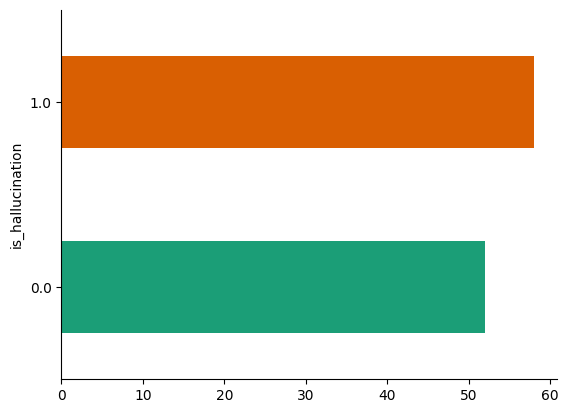

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('is_hallucination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy
df_test = df_test.drop(["line_id"], axis=1)
df_test = df_test.dropna(subset=[column_name])
fill_na(df_test, text_features)
unique_values = sorted(df_test[column_name].unique())
value_to_index = {value: index for index, value in enumerate(unique_values)}
print(unique_values)
def value_to_list(value):
        result = [0] * len(unique_values)
        result[value_to_index[value]] = 1
        return result
df_test[column_name] = df_test[column_name].apply(value_to_list)
df_test.head(20)

[0.0, 1.0]


,summary,question,answer,is_hallucination
0,Аристотель впервые в собственной отдельной раб...,В каком году разделили животных на многоклеточ...,Животных разделили на многоклеточных и простей...,"[1, 0]"
1,"В среднем, человек проводит около 6 лет своей ...",Сколько примерно лет в среднем человек проводи...,"Факт: В среднем, человек проводит около 6 лет ...","[0, 1]"
2,"В среднем, человек проводит около 6 лет своей ...",Сколько примерно лет в среднем человек проводи...,Человек проводит в ожиданиях от 8 до 25 лет св...,"[0, 1]"
3,"В мире существует вид морского существа, извес...","Как называется процесс, позволяющий “бессмертн...","Процесс, позволяющий 'бессмертной медузе' турр...","[1, 0]"
4,"В мире существует вид морского существа, извес...","Как называется процесс, позволяющий “бессмертн...","Это происходит при помощи особого механизма, н...","[0, 1]"
5,"В среднем, человек проводит около 6 лет своей ...",Сколько примерно лет в среднем человек проводи...,6 лет,"[1, 0]"
6,"Когда в доме появляется кошка, она становится ...",Сколько максимум могут жить кошки?,"С точки зрения экстерьера, продолжительность ж...","[0, 1]"
7,"Когда в доме появляется кошка, она становится ...",Сколько максимум могут жить кошки?,Максимальная продолжительность жизни кошек сос...,"[1, 0]"
8,"Самая большая пустыня в мире - Сахара, которая...",Какая пустыня является самой большой в мире?,Самая большая пустыня в мире - Сахара.,"[1, 0]"
9,"Самое глубокое озеро в мире - озеро Байкал, ра...",Какое озеро является самым глубоким в мире?,Самое глубокое озеро в мире - озеро Байкал.,"[1, 0]"


In [ ]:
df_test = df.reset_index(drop=True)
testing_no_train = CustomDataset(df_test, tokenizer, MAX_LEN)
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

In [ ]:
testing_loader = DataLoader(testing_no_train, **train_params)

In [ ]:
outputs, targets = validation(0, model_loaded)
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.94
F1 Score (Micro) = 0.9410085632730733
F1 Score (Macro) = 0.9409941684072718
